Programación para *Data Science*
============================

Unidad 8: Visualitzación de datos en Python
-----------------------------------------------------


---

## Ejercicios para la PEC

A continuación encontraréis los **ejercicios y preguntas teóricas que debe completar en esta PEC** y que forman parte de la evaluación de esta unidad.

### Ejercicio 1

Pokemon es una saga RPG muy famosa a nivel mundial. La misión de estos juegos es capturar y entrenar a los pokemon, unas criaturas que habitan en todo el continente, para hacerse con el título de maestro de la liga Pokemon. Los Pokemons son criaturas muy diversas, hay muchos tipos diferentes y algunos de ellos pueden evolucionar.

En este ejercicio exploraremos los Pokemons de la primera generación con el dataset `pokemon.csv`. <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 3px; ">NM</span> 


1. ¿Cuántos Pokemons legendarios hay? Cuántos Pokemons hay de cada tipo de evolución (_variable Stage_)?

2. ¿Cuál es el tipo más frecuente? Y el menos?

3. Un nuevo entrenador tiene que escoger entre 3 Pokemons iniciales (Bulbasaur, Charmander y Squirtle) y nos ha pedido que le ayudemos a decidir basándonos en las estadísticas de los pokemons de estos tres tipos (Grass, Fire y Water) . Si nos centramos sólo en las características de ataque y defensa, qué tipo deberíamos recomendar?

**Representa las respuestas gráficamente.**

Pista: podéis utilizar la función jointplot que hemos visto en el Notebook de teoría. Considerad qué tipo de gráfica, de entre las que ofrece jointplot, se ajusta a los requerimientos del enunciado.

**(2.5 puntos)**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Mostramos las gráficas en el notebook
%matplotlib inline

# Indicamos que queremos utilizar el estilo "whitegrid" de Seaborn
sns.set_style("whitegrid")

# Desactivamos unos warnings porque no nos aparezcan
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning) 


# Cargamos los datos del fichero Pokemon.csv en un dataframe

pkmn = pd.read_csv('data/Pokemon.csv') 

# Visualizamos las primeras filas del dataset
pkmn.head()

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


Número de Pokemons no legendarios: 147
Número de Pokemons legendarios: 4


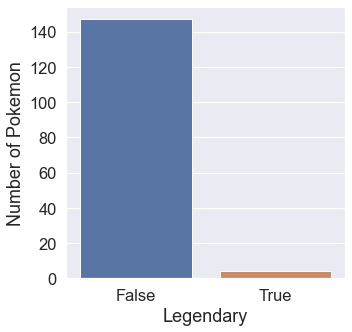

In [2]:
##1

# Cuántos Pokemons legendarios hay?

pkmn_no_leg=np.sum(pkmn['Legendary']==0)
pkmn_leg=np.sum(pkmn['Legendary']==1)

print(f"Número de Pokemons no legendarios: {pkmn_no_leg}")
print(f"Número de Pokemons legendarios: {pkmn_leg}")

#Graficamos la respuesta
plt.figure(figsize=(5,5))
sns.set(font_scale = 1.5)
legend_ = sns.countplot(x="Legendary", data=pkmn)
legend_ = plt.ylabel('Number of Pokemon')

Número de Pokemons Stage 1: 79
Número de Pokemons Stage 2: 56
Número de Pokemons Stage 3: 16


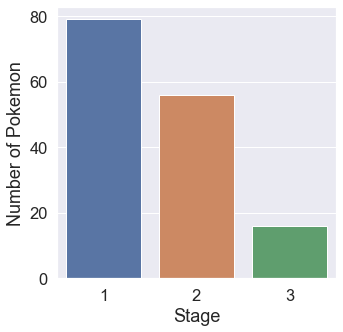

In [3]:
#Cuántos pokemons hay de cada evolución?

#OPCIÓN A
pkmn_S1=np.sum(pkmn['Stage']==1)
pkmn_S2=np.sum(pkmn['Stage']==2)
pkmn_S3=np.sum(pkmn['Stage']==3)

print(f"Número de Pokemons Stage 1: {pkmn_S1}")
print(f"Número de Pokemons Stage 2: {pkmn_S2}")
print(f"Número de Pokemons Stage 3: {pkmn_S3}")

#OPCIÓN B
pkmn_= pkmn.groupby('Stage').count().Number

#Graficamos la respuesta
plt.figure(figsize=(5,5))
sns.set(font_scale = 1.5)
stage_ = sns.countplot(x="Stage", data=pkmn)
stage_ = plt.ylabel('Number of Pokemon')

Type 1
Bug         12
Dragon       3
Electric     9
Fairy        2
Fighting     7
Fire        12
Ghost        3
Grass       12
Ground       8
Ice          2
Normal      22
Poison      14
Psychic      8
Rock         9
Water       28
Name: Number, dtype: int64


El tipo más frecuente es el de 14 con 28 pokemons
El tipo menos frecuente es el de Fairy con 2 pokemons


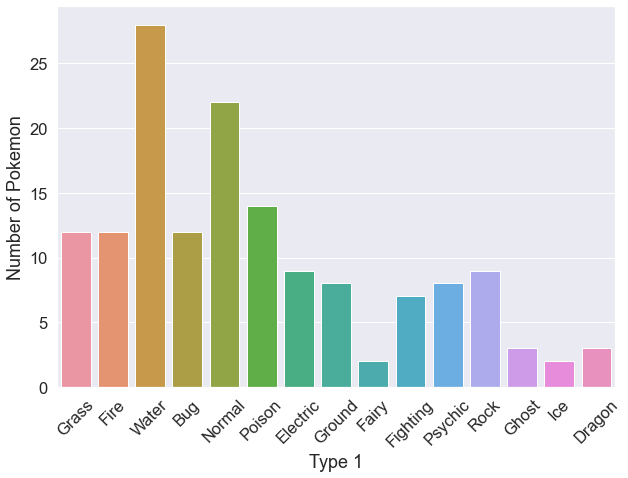

In [4]:
##2

#Cuál es el tipo más frecuente? Y el menos?

#Mostramos el número de pokemons para cada tipo
print(pkmn.groupby('Type 1')['Number'].count())

print("\n")

#Mostramos cuál es el tipo más y menos frecuente

print(f"El tipo más frecuente es el de " + str(pkmn.groupby('Type 1')['Number'].count().argmax()) +
        " con " + str(pkmn.groupby('Type 1')['Number'].count().max()) + " pokemons")
print(f"El tipo menos frecuente es el de " + str(pkmn.groupby('Type 1')['Number'].count().idxmin()) +
       " con " + str(pkmn.groupby('Type 1')['Number'].count().min()) + " pokemons")

#Indicamos que queremos utilizar el estilo "whitegrid" de Seaborn
sns.set_style("whitegrid")

#Graficamos la respuesta
plt.figure(figsize=(10,7))
sns.set(font_scale = 1.5)
type_ = sns.countplot(x="Type 1", data=pkmn)
type_ = plt.xticks(rotation=45)
type_ = plt.ylabel('Number of Pokemon')

In [5]:
##3

#Que pokemon inicial debemos escoger?

#Seleccionamos los pokemons de tipo agua, fuego y planta
pkmn_iniciales_tipos = pkmn[pkmn["Type 1"].isin(["Grass", "Fire","Water"])]

#Seleccionamos las características que queremos evaluar
pkmn_iniciales_tipos_stats=pkmn_iniciales_tipos[["Type 1","HP","Attack","Defense"]]

#Especificamos unos colores concretos para cada tipo de pokemon en los plots (verde = planta, azul = agua, rojo = fuego)
colors_pkm=["#8fd400","#ff0000","#1f75fe"]

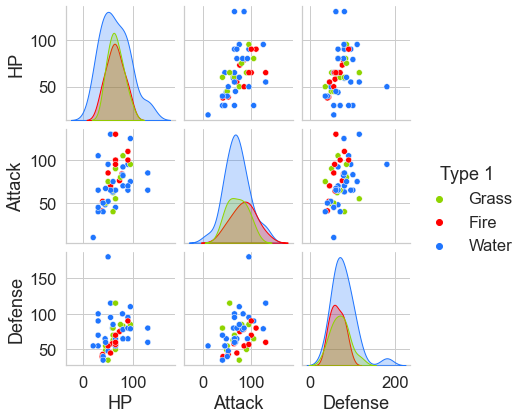

In [6]:
#OPCIÓN A: pairplot

#Indicamos que queremos utilizar el estilo "whitegrid" de Seaborn
sns.set_style("whitegrid")

#Graficamos la respuesta
sns.pairplot(pkmn_iniciales_tipos_stats, hue="Type 1",height=2, palette=colors_pkm)

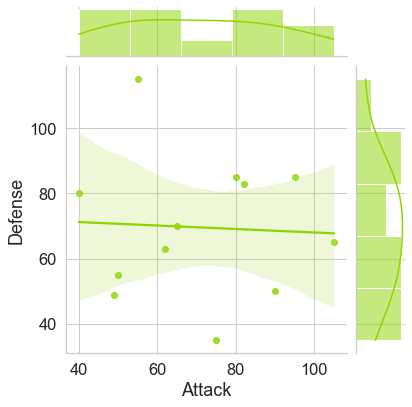

In [7]:
#OPCIÓN B: jointplot

#Indicamos que queremos utilizar el estilo "whitegrid" de Seaborn
sns.set_style("whitegrid")

# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=pkmn_iniciales_tipos_stats[pkmn_iniciales_tipos_stats['Type 1']=='Grass'],
             color ="#8fd400",kind ='reg')

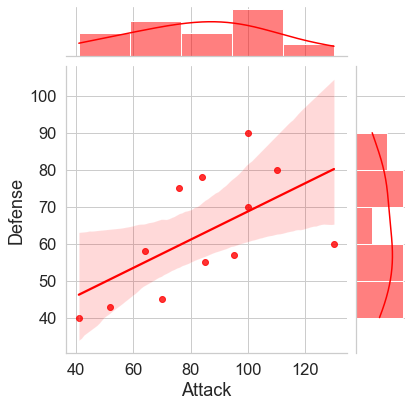

In [7]:
#Indicamos que queremos utilizar el estilo "whitegrid" de Seaborn
sns.set_style("whitegrid")

sns.jointplot(x='Attack', y='Defense', data=pkmn_iniciales_tipos_stats[pkmn_iniciales_tipos_stats['Type 1']=='Fire'],
             color ="#ff0000",kind ='reg')

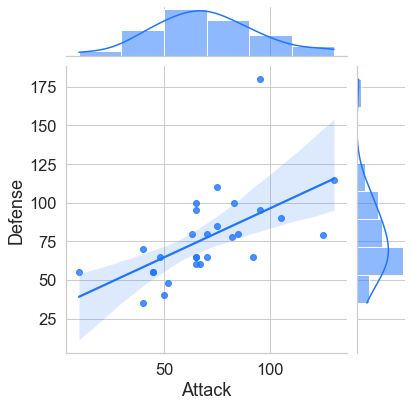

In [8]:
#Indicamos que queremos utilizar el estilo "whitegrid" de Seaborn
sns.set_style("whitegrid")

sns.jointplot(x='Attack', y='Defense', data=pkmn_iniciales_tipos_stats[pkmn_iniciales_tipos_stats['Type 1']=='Water'], 
    color ="#1f75fe", kind ='reg')

**Respuesta**

No hay una sola solución correcta en este ejercicio ;) Una buena respuesta sería recomendar un pokemon inicial de agua o fuego, ya que tienen una correlación positiva ente ataque y defensa, por tanto, los pokemons evolucionados con ataque alto tendrán también una defensa alta.

### Exercici 2

La ciudad de Barcelona está realizando un estudio para ampliar las áreas verdes de la ciudad. Es por ello que el ayuntamiento de Barcelona requiere de nuestro servicio para construir un mapa **interactivo** que muestre los puntos donde hay árboles y palmeras en la ciudad.

Nos piden crear un mapa utilizando la librería _geoplotlib_ que nos debe permitir ver la localización de cada árbol/palmera. <span style="font-family: Courier New; background-color: #ffcc5c; color: #000000; padding: 3px; ">EG</span>

Nota 1: Puede obtener los datos del arbolado de zona de la ciudad de Barcelona en el portal [Open Data BCN](https://opendata-ajuntament.barcelona.cat/data/es/dataset) y [cargar los datos](https://github.com/andrea-cuttone/geoplotlib/wiki/user-Guide#loading-data) a partir de un diccionario o un dataframe. Sino también puede cargar el conjunto de datos `arbrat_zona.csv` **(que os proporcionamos junto con el enunciado de la PEC)**.

Nota 2: Es importante que los tipos diferentes de zonas (arbol o palmera) tengan distinto color en el mapa.

**(2.5 puntos)**

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mostramos las gráficas en el notebook
%matplotlib inline

# Indicamos que queremos utilizar el estilo "whitegrid" de Seaborn
sns.set_style("whitegrid")

# Cargamos los datos del fichero arbrat_zona.csv en un dataframe
arbrat = pd.read_csv('data/arbrat_zona.csv') 

# Visualizamos las primeras filas
arbrat.head()

,CODI,X_ETRS89,Y_ETRS89,LATITUD_WGS84,LONGITUD_WGS84,TIPUS_ELEMENT,ESPAI_VERD,ADRECA,ALCADA,CAT_ESPECIE_ID,NOM_CIENTIFIC,DATA_PLANTACIO,MIDA_ESCOCELL,VORA_ESCOCELL
0,0000002AR,430310.290,4587826.297,41.438986,2.165807,PALMERA ZONA,"Can Ensenya, C.V. (Fabra i Puig 439, Villalba ...","Pg Fabra i Puig, 449",PETITA,1155,Chamaerops humilis,NaN,NaN,NaN
1,0000008AR,430286.284,4587772.394,41.438498,2.165526,PALMERA ZONA,"Can Ensenya, C.V. (Fabra i Puig 439, Villalba ...","Pg Fabra i Puig, 441",MITJANA,636,Yucca gigantea,NaN,NaN,NaN
2,0000011AR,430283.101,4587767.264,41.438452,2.165488,PALMERA ZONA,"Can Ensenya, C.V. (Fabra i Puig 439, Villalba ...","Pg Fabra i Puig, 441",MITJANA,636,Yucca gigantea,NaN,major que o igual a 100 cm,VORA METÀL·LICA
3,0000019AR,430304.163,4587711.846,41.437955,2.165747,PALMERA ZONA,"Can Ensenya, C.V. (Fabra i Puig 439, Villalba ...","C\ Vilalba dels Arcs, 94",PETITA,1155,Chamaerops humilis,NaN,NaN,NaN
4,0001140AR,430485.344,4587434.544,41.435473,2.167947,ARBRE ZONA,"Central de Nou Barris, Parc","Pg Urrutia, 70",GRAN,563,Tipuana tipu,NaN,NaN,NaN


In [10]:
# Renombramos las columnas de longitud y latitud para que puedan utilizarse con el geoplotlib
arbrat.rename(index=str, columns={'LONGITUD_WGS84': 'lon', 'LATITUD_WGS84': 'lat'}, inplace=True)

# Comprobamos que el cambio se ha aplicado correctamente
arbrat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47264 entries, 0 to 47263
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CODI            47264 non-null  object 
 1   X_ETRS89        47264 non-null  float64
 2   Y_ETRS89        47264 non-null  float64
 3   lat             47264 non-null  float64
 4   lon             47264 non-null  float64
 5   TIPUS_ELEMENT   47264 non-null  object 
 6   ESPAI_VERD      42331 non-null  object 
 7   ADRECA          47264 non-null  object 
 8   ALCADA          43359 non-null  object 
 9   CAT_ESPECIE_ID  47264 non-null  int64  
 10  NOM_CIENTIFIC   47264 non-null  object 
 11  DATA_PLANTACIO  2388 non-null   object 
 12  MIDA_ESCOCELL   9300 non-null   object 
 13  VORA_ESCOCELL   32051 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 3.6+ MB


In [ ]:
import geoplotlib

# Cargamos los datos del dataframe con geoplotlib 
gdata1 = geoplotlib.utils.DataAccessObject.from_dataframe(arbrat[arbrat['TIPUS_ELEMENT']=='PALMERA ZONA'])
gdata2 = geoplotlib.utils.DataAccessObject.from_dataframe(arbrat[arbrat['TIPUS_ELEMENT']=='ARBRE ZONA'])

# Mostramos los puntos del fichero en colores diferentes
geoplotlib.dot(gdata2, color='g', point_size=5, f_tooltip=lambda x : str(x['TIPUS_ELEMENT']) )
geoplotlib.dot(gdata1, color='r', point_size=5, f_tooltip=lambda x : str(x['TIPUS_ELEMENT']) )

# Mostramos el mapa
geoplotlib.show()

### Ejercicio 3

Teniendo en cuenta los datos obtenidos en el ejercicio anterior, el ayuntamiento de Barcelona también nos pide llevar a cabo un análisis descriptivo de los árboles. <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 3px; ">NM</span> 

1. ¿Cuántos árboles y cuántas palmeras han plantado cada año? **Ver resultados separados para cada grupo (árbol y palmera).**

2. Adicionalmente, se nos pide generar una gráfica que muestre la **distribución** de los meses en los que se han plantado árboles y palmeras en los últimos 3 años (de 2017 2019).

Nota 1: La columna con la información de la fecha de plantación tiene missing. Por lo tanto, se deben seleccionar sólo aquellas filas con este dato.

Nota 2: Para obtener la información del mes y año a partir de la fecha, puede utilizar la función _DatetimeIndex_ de la librería pandas.

Nota 3: La visualización de los datos debería ser atractiva y clara a fin de que los responsables del ayuntamiento puedan sacar conclusiones de ellas.


**(2.5 puntos)**

In [13]:
##1 

# Cuántos árboles y cuántas palmeras han plantado cada año?

# En la columna de la fecha de plantación hay missings, por lo que nos vamos a quedar con aquellas filas que no tienen y descartaremos el resto.
arbrats_nonans=arbrat.dropna(subset=['DATA_PLANTACIO'])

# Creamos dos columnas nuevas con la información del año y el mes en que se ha producido la plantación
arbrats_nonans['ANY_PLANTACIO']=pd.DatetimeIndex(arbrats_nonans['DATA_PLANTACIO']).year
arbrats_nonans['MES_PLANTACIO']=pd.DatetimeIndex(arbrats_nonans['DATA_PLANTACIO']).month

print(arbrats_nonans.groupby(['ANY_PLANTACIO','TIPUS_ELEMENT'])['CODI'].count())

/Users/alexandraabos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


ANY_PLANTACIO  TIPUS_ELEMENT
2007           ARBRE ZONA        30
2008           ARBRE ZONA         9
               PALMERA ZONA       3
2009           ARBRE ZONA       118
               PALMERA ZONA       6
2010           ARBRE ZONA       473
               PALMERA ZONA       2
2011           ARBRE ZONA       281
               PALMERA ZONA      13
2012           ARBRE ZONA        98
2013           ARBRE ZONA       203
2014           ARBRE ZONA       365
               PALMERA ZONA       3
2015           ARBRE ZONA        49
2016           ARBRE ZONA       288
               PALMERA ZONA       2
2017           ARBRE ZONA       122
               PALMERA ZONA       8
2018           ARBRE ZONA        98
               PALMERA ZONA       5
2019           ARBRE ZONA       205
               PALMERA ZONA      10
Name: CODI, dtype: int64


/Users/alexandraabos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


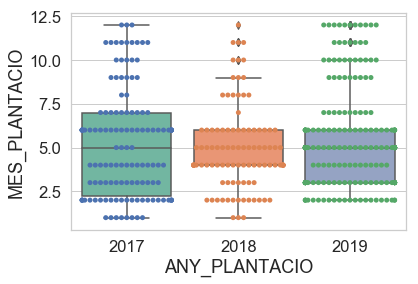

In [14]:
##2

# Distribución de los meses en los que se han plantado árboles y palmeras en los últimos 3 años (de 2017 2019).

# Seleccionamos los árboles / palmeras plantados en los últimos 3 años (> = 2.017)
arbrats_nonans_17_19=arbrats_nonans[arbrats_nonans['ANY_PLANTACIO']>=2017]

# Mostramos la distribución de la plantación de árboles / palmeras en función del mes del año utilizando un boxplot
axis = sns.boxplot(y="MES_PLANTACIO", x="ANY_PLANTACIO", data=arbrats_nonans_17_19,palette="Set2", dodge=True)
axis = sns.swarmplot(y="MES_PLANTACIO", x="ANY_PLANTACIO", data=arbrats_nonans_17_19)

### Ejercicio 4

Juego de Tronos es conocida por las complicadas interacciones entre sus personajes. En este ejercicio trabajaremos con el conjunto de datos `book1.csv` que constituye una red de las relaciones entre los personajes del primer libro de _Juego de Tronos_. <span style="font-family: Courier New; background-color: #ffcc5c; color: #000000; padding: 3px; ">EG</span>

Cada fila representa un link entre 2 personajes (Source y Target) y el valor (Weight) indica el número de veces que han interaccionado.

1. Representad gráficamente el grafo y pintad de diferente color cada comunidad detectada.

2. Cuál es el personaje más importante del primer libro de Juego de Tronos?

Nota: La importancia de un nodo dentro de una red se mide con el número de nodos a los que está conectado. Esta característica se conoce con el nombre de **degree_centrality**. Podéis ver este [link](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality) para más información:

**(2.5 puntos)**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx 

# Cargamos los datos del fichero book1.csv en un dataframe
book1 = pd.read_csv('data/book1.csv')

# Visualizamos las primeras filas del dataset
book1.head()

,Source,Target,Type,weight,book
0,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
1,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
2,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1
3,Aemon-Targaryen-(Maester-Aemon),Jeor-Mormont,Undirected,13,1
4,Aemon-Targaryen-(Maester-Aemon),Jon-Snow,Undirected,34,1


In [16]:
# Datos disponibles para el ejercicio

# Creamos un objeto grafo vacío
G_book1 = nx.Graph()

# Iteramos para todas las filas del dataset
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    

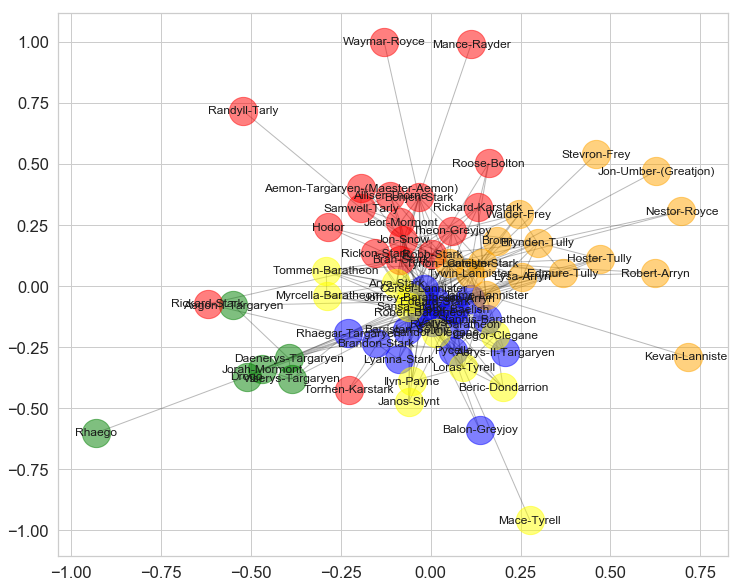

In [17]:
## 1

# Representa gráficamente el grafo y pinta de diferente color cada comunidad detectada

# Importamos la librería de detección de comunidades.
from community import community_louvain

# Generamos una nueva figura.
plt.figure(1, figsize=(12, 10)) 

# Calculamos las posiciones de los nodos del grafo en el plano con el algoritmo spring
graph_pos = nx.spring_layout(G_book1)

# Detectamos las comunidades existentes en el grafo.
partition = community_louvain.best_partition(G_book1)

# Definimos los colores que utilizaremos para los nodos
colors = ['green', 'blue', 'red', 'orange', 'yellow', 'magenta', 'white','black']

# Para cada comunidad detectada, mostramos los nodos
for count, com in enumerate(set(partition.values())):

    # Seleccionamos los nodos de la comunidad que estamos procesando
    list_nodes = [nodes for nodes in partition.keys() 
                  if partition[nodes] == com]

    # Mostramos los nodos, coloreados según la comunidad a la que pertenecen
    nx.draw_networkx_nodes(G_book1, graph_pos, list_nodes, 
                           node_size = 800,
                           node_color = colors[count],
                           alpha = 0.5)

# Mostramos las aristas del grafo, especificando la posición, el color y la transparencia
nx.draw_networkx_edges(G_book1, graph_pos, edge_color='k', alpha=0.3)

# Mostramos las etiquetas, indicando la fuente y el tamaño
a = nx.draw_networkx_labels(G_book1, graph_pos, font_size=12, font_family='sans-serif')

In [18]:
##2

# ¿Cuál es el personaje más importante del primer libro de Juego de Tronos?

# Calculamos el degree centrality por cada relación
deg_cen_book1 = nx.degree_centrality(G_book1)

# Ordenamos el resultado de mayor a menor
sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]
print(sorted_deg_cen_book1)

[('Robert-Baratheon', 0.6153846153846154), ('Eddard-Stark', 0.5384615384615385), ('Catelyn-Stark', 0.4307692307692308), ('Sansa-Stark', 0.4153846153846154), ('Tyrion-Lannister', 0.4), ('Jaime-Lannister', 0.35384615384615387), ('Joffrey-Baratheon', 0.35384615384615387), ('Robb-Stark', 0.35384615384615387), ('Bran-Stark', 0.3230769230769231), ('Cersei-Lannister', 0.3230769230769231)]


**Respuesta**

El personaje más importante en el primer libro de Juego de Tronos es Robert Baratheon (0615) seguido por Eddard Stark (0538)!

### Ejercicio Opcional

Mediante la _degree centrality_ hemos podido descubrir cuál es el personaje más importante del primer libro de _Juego de Tronos_. Sin embargo, esta saga consta de cinco volúmenes, por lo tanto, tiene sentido que la importancia de los personajes cambie a lo largo de los cinco libros.

En este ejercicio estudiaremos la evolución de los personajes mediante la red de relaciones de los cinco libros. Trabajaremos con los conjuntos de datos `book1.csv`,` book2.csv`, `book3.csv`,` book4.csv` y `book5.csv` **(que os proporcionamos junto con el enunciado de la PEC)**. <span style="font-family: Courier New; background-color: #f2ae72; color: #000000; padding: 3px; ">EI</span>

- ¿Cuál es el personaje más importante de cada libro?
- Muestra gráficamente cómo varía la importancia de Eddard Stark, Arya Stark, Tyrion Lannister, Jon Snow y Cersei Lannister en cada libro.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx 

# Cargamos los datos de los ficheros en un grafo
books = []
book_fnames = ['data/book1.csv','data/book2.csv', 'data/book3.csv', 'data/book4.csv', 'data/book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

In [20]:
# 1 

# Cuál es el personaje más importante de cada libro?

# Calculamos la degree centrality por cada libro
deg_cen_book1 = nx.degree_centrality(books[0])
deg_cen_book2 = nx.degree_centrality(books[1])
deg_cen_book3 = nx.degree_centrality(books[2])
deg_cen_book4 = nx.degree_centrality(books[3])
deg_cen_book5 = nx.degree_centrality(books[4])

# Ordenamos el diccionario según la degree centrality y guardamos el top 5
sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:5]
sorted_deg_cen_book2 = sorted(deg_cen_book2.items(), key=lambda x:x[1], reverse=True)[0:5]
sorted_deg_cen_book3 = sorted(deg_cen_book3.items(), key=lambda x:x[1], reverse=True)[0:5]
sorted_deg_cen_book4 = sorted(deg_cen_book4.items(), key=lambda x:x[1], reverse=True)[0:5]
sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse=True)[0:5]

# Mostramos el top 5 de cada libro
print("Top 5 llibre 1 \n")
print(sorted_deg_cen_book1)
print("Top 5 llibre 2 \n")
print(sorted_deg_cen_book2)
print("Top 5 llibre 3 \n")
print(sorted_deg_cen_book3)
print("Top 5 llibre 4 \n")
print(sorted_deg_cen_book4)
print("Top 5 llibre 5 \n")
print(sorted_deg_cen_book5)

Top 5 llibre 1 

[('Robert-Baratheon', 0.6153846153846154), ('Eddard-Stark', 0.5384615384615385), ('Catelyn-Stark', 0.4307692307692308), ('Sansa-Stark', 0.4153846153846154), ('Tyrion-Lannister', 0.4)]
Top 5 llibre 2 

[('Tyrion-Lannister', 0.2054263565891473), ('Joffrey-Baratheon', 0.1821705426356589), ('Cersei-Lannister', 0.16666666666666666), ('Arya-Stark', 0.15503875968992248), ('Stannis-Baratheon', 0.1434108527131783)]
Top 5 llibre 3 

[('Tyrion-Lannister', 0.19536423841059603), ('Jon-Snow', 0.17218543046357615), ('Joffrey-Baratheon', 0.16556291390728478), ('Robb-Stark', 0.16225165562913907), ('Sansa-Stark', 0.15894039735099338)]
Top 5 llibre 4 

[('Jaime-Lannister', 0.23443223443223443), ('Cersei-Lannister', 0.21978021978021978), ('Brienne-of-Tarth', 0.10256410256410256), ('Tyrion-Lannister', 0.09523809523809523), ('Margaery-Tyrell', 0.09157509157509157)]
Top 5 llibre 5 

[('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.148734

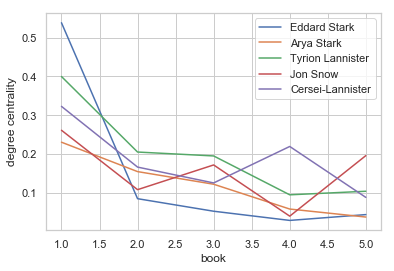

In [21]:
# 2 

# Muestra gráficamente cómo varía la importancia de los personajes

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# Mostramos las gráficas en el notebook
%matplotlib inline

# Indicamos que queremos utilizar el estilo "whitegrid" de Seaborn
sns.set_style("whitegrid")

# Creamos una lista con la degree centrality de todos los libros
evol = [nx.degree_centrality(book) for book in books]
 
# Convertimos la lista en DataFrame
degree_evol_df = pd.DataFrame.from_records(evol)

# Ponemos el número de los libros como eje x
nbooks=[1,2,3,4,5]

# Graficamos la variación de degree_centrality por cada personaje
ax = sns.lineplot(y=degree_evol_df['Eddard-Stark'], x=nbooks)
ax = sns.lineplot(y=degree_evol_df['Arya-Stark'], x=nbooks)
ax = sns.lineplot(y=degree_evol_df['Tyrion-Lannister'], x=nbooks)
ax = sns.lineplot(y=degree_evol_df['Jon-Snow'], x=nbooks)
ax = sns.lineplot(y=degree_evol_df['Cersei-Lannister'], x=nbooks)

ax.set(xlabel='book', ylabel='degree centrality')
plt.legend(loc='upper right', labels=['Eddard Stark', 'Arya Stark','Tyrion Lannister','Jon Snow','Cersei-Lannister'])
plt.show(ax)